<a href="https://colab.research.google.com/github/emanuel379/Inferencia-Estatistica/blob/main/An%C3%A1lise_explorat%C3%B3ria_e_Infer%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Selecionando uma amostra com python

data = pd.DataFrame() # Criando um DataFrame
data['Population'] = [21, 22, 24, 36, 38, 49, 57, 65, 80, 90, 94]

amostragem_sem_repetição = data['Population'].sample(5, replace = False) # Retirando uma amostra de cinco indivíduos sem reposição
amostragem_com_repetição = data['Population'].sample(5, replace = True) # Retirando uma amostra de cinco indivíduos com reposição

In [ ]:
# Observando as amostras coletadas
print(amostragem_sem_repetição)
print(amostragem_com_repetição)

7     65
9     90
10    94
4     38
3     36
Name: Population, dtype: int64
0     21
6     57
10    94
7     65
4     38
Name: Population, dtype: int64


In [ ]:
# Calculando média, variância e desvio padrão da população

population_mean = data['Population'].mean()
population_var = data['Population'].var(ddof=0) # ddof= 0 significa que o denominador é o próprio n
population_std = data['Population'].std(ddof=0)
print('Population mean is ', population_mean)
print('Population variance is', population_var)
print('Population variance is', population_std)

Population mean is  52.36363636363637
Population variance is 662.7768595041322
Population variance is 25.74445298514094


In [ ]:
# Calculando média e variância de uma amostra aleatória com reposição e com n = 10

amostra = data['Population'].sample(10, replace=True)
sample_mean = amostra.mean()
sample_var = amostra.var(ddof = 1) # ddof= 1 significa que o denominador é n - 1
sample_std = amostra.std(ddof = 1)
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)
print('Sample variance is', sample_std)

Sample mean is  52.1
Sample variance is 786.5444444444445
Sample variance is 28.045399701991137


In [ ]:
# Extraindo uma coleção de valores para a variância amostral

sample_length = 500
sample_variance_collection = [data['Population'].sample(10, replace=True).var(ddof=1) for i in range(sample_length)]
print(sample_variance_collection)

[491.4333333333333, 562.0444444444444, 642.5444444444444, 877.1222222222223, 573.7777777777778, 803.7888888888889, 405.9555555555556, 438.9888888888888, 564.2222222222222, 886.0444444444444, 799.6555555555556, 897.7333333333335, 802.6222222222221, 962.8444444444444, 616.6222222222223, 733.5999999999999, 480.6666666666667, 578.2222222222222, 621.3444444444444, 982.0999999999999, 886.0111111111112, 856.4555555555556, 593.3444444444444, 1103.8222222222223, 418.9888888888888, 633.3777777777777, 950.4555555555556, 324.67777777777775, 533.7888888888888, 704.4444444444445, 814.5, 287.15555555555557, 1092.0444444444443, 890.0, 611.4333333333333, 515.7888888888888, 494.0, 741.8222222222223, 840.9, 284.7111111111111, 765.8777777777777, 661.1222222222223, 831.9555555555555, 201.2888888888889, 636.9333333333333, 614.5, 272.44444444444446, 560.6222222222223, 648.9444444444445, 795.5666666666667, 545.3777777777777, 366.67777777777775, 338.0444444444445, 511.9555555555555, 824.1, 961.7333333333333, 8

In [ ]:
# Criando novas amostras aleatórias com distribuição normal cada vez que o código roda

Fstsample = pd.DataFrame(np.random.normal(10, 5, size=30))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  8.22134007981976
sample SD is  3.761459076608022


In [ ]:
# Criando uma lista para armazenar as médias e variâncias das amostras

meanlist = []
varlist = []
for t in range(100000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].mean())

In [ ]:
# Armazenando nossas listas em uma colunas do nosso DataFrame

collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

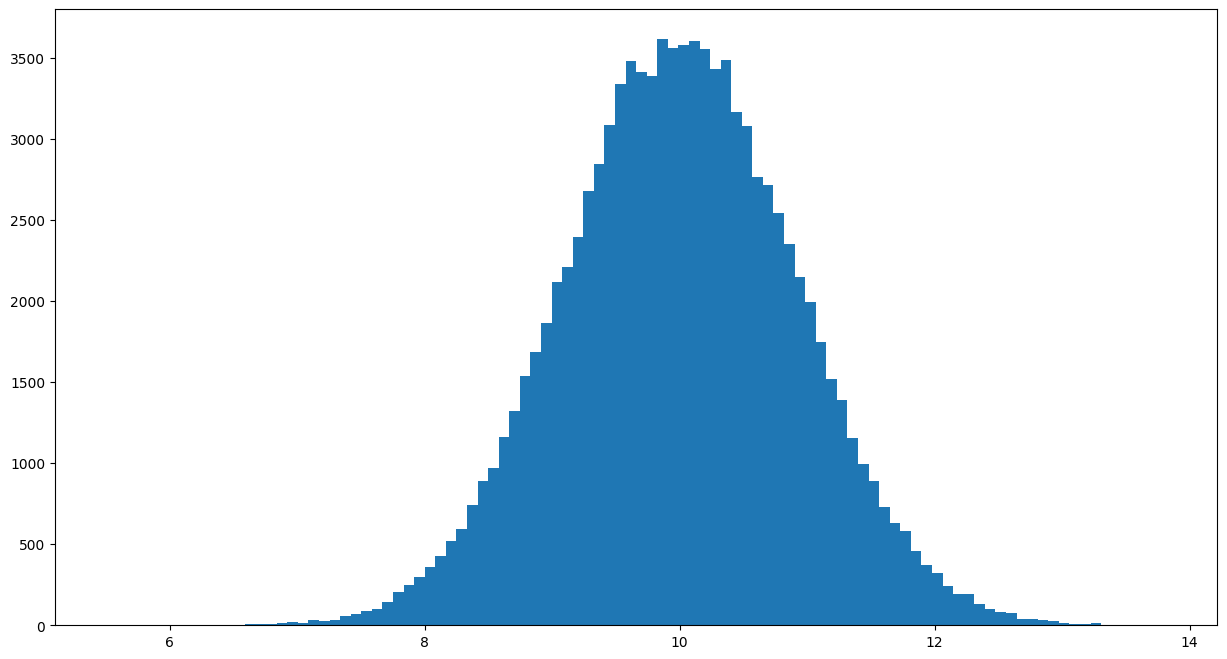

In [ ]:
# Plotando um histograma das médias

collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

<Axes: >

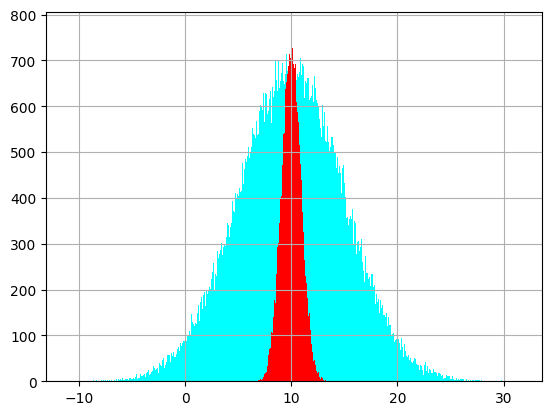

In [16]:
from numpy.random.mtrand import normal

# Criando um gráfico que conttenha informações para a média população e para a amostra

pop = pd.DataFrame(normal( 10, 5, size = 100000))
pop['meanlist'] = meanlist
pop[0].hist( bins = 500, color = 'cyan') # População
pop['meanlist'].hist( bins = 500, color = 'red') # Amostra

In [ ]:
# Demonstrando que, conforme almentamos o tamanho da amostra, ela converge para uma normal
# Plotando um histograma para as médias e verificando como os gráficos se aproximam da normal

sample_size = int(input())
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # Pequeno tamanho de amostra
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))

In [ ]:
# Pegando informações de aulas anteriores

ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close']) # Usando log return para calcular ganhos

# Construindo um intervalo de confiânça de 95%

sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5 # Criando o desvio padrão de uma função qualquer para uma normal

# Definindo os quaantis de 2,5% e 97,5%

z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975)

# Definindo os extremos do intervalo

interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std

# Imprimindo uma mensagem

print('O intervalo de confiânça de 95% para a média é ', (interval_left, interval_right))

In [ ]:
# Com as informações acima de importação de arquivo csv e logReturn
# Plotando um gráfico de linha com logReturn e linha divisória entre lucro e prejuízo

ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

In [ ]:
# Calculando a média e desvio padrão para que possamos convergir a distribuição da amostra para uma t-student

sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0] # Tamanho da amostra

# Se o tamanho da amostra for suficientemente grande a distribuição t-student converge para a normal
# Consideranto uma H0 com mu = 0(não há lucro)
zhat = (sample_mean - 0)/(sample_std/n**0.5) # Normalizando a distribuição
print(zhat)

In [ ]:
# Nível de significância

alpha = 0.05

# Definindo os dois quantis e provando sua simetria

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric
print(zleft, zright)

# Calculando a rejeição sem o valor-p

print(f'Com um nível de confiança {alpha}, devemos rejeitar H0? {zhat>zright or zhat<zleft}')

In [ ]:
# Fazendo o mesmo processo de forma unilateral

sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# Usando mu = 0
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

alpha = 0.05

# Definindo  nosso único quantil de interesse

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

# Calculando sem o uzo do valor p

print(f'Com um nível de confiança {alpha}, devemos rejeitar H0? {zhat>zright}')

In [ ]:
# Calculando o valor-p

p = 1 - norm.cdf(zhat, 0, 1)
print(p)

# Vendo se existe compatibilidade entre o resultado do valor-p e os resultados anteriores

print(f'Com um nível de confiança {alpha}, devemos rejeitar H0? {p < alpha}')

In [ ]:
# Formas de calcular o valor-p para outros casos

# Para H1 representando média diferente a H0

p = 2(1-norm.cdf(np.abs(zhat), 0, 1))

# Para H1 média maior ou igual a apresentada em H0

p = 1-norm.cdf(zhat,0,1) # 1 - P(mu < 0), supondo H0: mu = 0

# Para H1 média menor ou igual a apresentada em H0

p = norm.cdf(zhat,0,1)

